# 作业7-机器学习-实战流程练习
**作业要求：**

- 在Python Jupyter中回答，**需运行出结果**。
- 网页-打印-另存为pdf，命名：**作业7-班级-学号后两位-姓名.pdf**
- 按时上传职教云，**过期不补**。

### 我们的任务：预测一个人的收入能否超过五万美元，超过：1，未超过：0

#### 数据说明：（adult.csv)
    - age 年龄 
    - workclass 工作类型 
    - fnlwgt 序号 
    - education_num 受教育时间 
    - maritial_status 婚姻状况 
    - relationship 关系 
    - race 种族 
    - sex 性别 
    - capital_gain 资本收益 
    - capital_loss 资本损失 
    - hours_per_week 每周工作小时数 
    - predclass 收入 (目标，需转换0/1)

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/adult.csv')
data.head()

,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,predclass
0,39.0,State-gov,77516,13.0,Never-married,Not-in-family,White,Male,2174,0,40,<=50K
1,50.0,Self-emp-not-inc,83311,13.0,Married-civ-spouse,Husband,White,Male,0,0,13,<=50K
2,38.0,Private,215646,9.0,Divorced,Not-in-family,White,Male,0,0,40,<=50K
3,53.0,Private,234721,7.0,Married-civ-spouse,Husband,Black,Male,0,0,40,<=50K
4,28.0,Private,338409,13.0,Married-civ-spouse,Wife,Black,Female,0,0,40,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25351 entries, 0 to 25350
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             25325 non-null  float64
 1   workclass       24006 non-null  object 
 2   fnlwgt          25351 non-null  int64  
 3   education-num   25335 non-null  float64
 4   marital-status  25351 non-null  object 
 5   relationship    25351 non-null  object 
 6   race            25348 non-null  object 
 7   sex             25335 non-null  object 
 8   capital-gain    25351 non-null  int64  
 9   capital-loss    25351 non-null  int64  
 10  hours-per-week  25351 non-null  int64  
 11  predclass       25351 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.3+ MB


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,25325.000000,2.535100e+04,25335.000000,25351.000000,25351.000000,25351.000000
mean,39.275064,1.894755e+05,10.227946,1345.458207,97.202359,40.902568
std,14.328725,1.051983e+05,2.580072,8341.939894,425.115900,12.293895
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000
50%,38.000000,1.780130e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.365960e+05,13.000000,0.000000,0.000000,45.000000
max,200.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "SimHei"   # SimHei 中文黑体
mpl.rcParams["axes.unicode_minus"]=False

<AxesSubplot:>

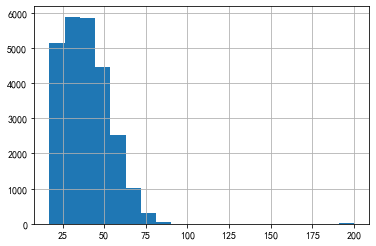

In [6]:
data['age'].hist(bins=20)

In [7]:
data['age'][data['age']>100] = 100

C:\Users\Viruse\AppData\Local\Temp/ipykernel_3908/2817996061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'][data['age']>100] = 100


workclass

In [8]:
data['workclass']

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
25346                 NaN
25347           Local-gov
25348             Private
25349             Private
25350        Self-emp-inc
Name: workclass, Length: 25351, dtype: object